# Classification test

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from joblib import dump, load


In [35]:
# df = pd.read_csv("data/BTCUSDT-hour-target-features.csv")
df = pd.read_csv("data/BTCUSDT-minute-target-dip-features.csv")

# df = pd.read_csv("data/BTCUSDT-hour-target-features-all-rate.csv")
# df = pd.read_csv("data/BTCUSDT-hour-target-features-all-puell.csv")

# df = pd.read_csv("data/BTCUSDT-hour-predict.csv")
# dfd = pd.read_csv("data/classification_test.csv")

In [36]:
df = df.loc[:,~df.columns.duplicated()]

In [37]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,volatility_dc_wband_10,volatility_pband_50,volatility_wband_20,volatility_ui_30,volume_cmf_50,volume_cmf_50_rate_200,volume_eom_amplified,volume_fi_amplified,volume_mfi_50,volume_nvi_o_close_rate_50
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7.564907e+03,3,0.075183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000e+00,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1.117543e+03,2,0.261074,...,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,5.117185e+01,3,0.012008,...,NaN,-inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,5.999993e+02,1,0.140796,...,NaN,-inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988733,2021-06-03 20:24:00,38665.26,38689.56,38655.91,38682.52,14.795718,1622751899999,5.722516e+05,457,5.929895,...,0.407242,1.537460,0.185447,0.203106,0.086877,0.000718,22.005562,7.176718,63.324366,-4710.563195
1988734,2021-06-03 20:25:00,38682.52,38682.53,38643.07,38649.70,16.778473,1622751959999,6.486770e+05,563,6.614560,...,0.407159,1.112781,0.186007,0.196684,0.066225,0.000572,21.708657,7.039071,62.115139,-3597.969795
1988735,2021-06-03 20:26:00,38649.69,38682.52,38649.69,38682.52,15.709853,1622752019999,6.074695e+05,566,11.004542,...,0.407020,1.506191,0.182926,0.189679,0.059552,0.000711,20.814424,7.122447,61.839091,-2043.765989
1988736,2021-06-03 20:27:00,38682.52,38682.69,38640.40,38649.38,23.010205,1622752079999,8.894626e+05,590,7.261787,...,0.331603,1.084595,0.188075,0.185529,0.043002,0.000332,17.011080,6.928135,60.186773,-919.361337


In [5]:
indicators = list(df.columns)[13:]
indicators.append("target")

In [38]:
indicators = ['volume_nvi_o_close_rate_50',
 'mom_srsi_10_d',
 'bb',
 'volatility_dc_wband_10',
 'volatility_bb_pband_100',
 'volatility_bb_wband_200',
 'trend_trix_20_log',
 'trend_vi_50_amp',
 'mom_rsi_30',
 'volume_cmf_50_rate_200',
 'trend_sma_200_diff_o_close_log',
 'mom_ppo_30_hist',
 'trend_sma_50_diff_log',
 'target']

In [39]:
d = df.copy()
d.dropna(inplace=True)
ft_split = 100000 #20000
close = d["close"][-ft_split:]
high = d["high"][-ft_split:]
low = d["low"][-ft_split:]


d = d[list(indicators)].copy().astype(np.float32)

X = d.drop(["target", "close"], axis=1, errors="ignore")[:-ft_split]
y = d["target"][:-ft_split]

X_ft = d.drop(["target", "close"], axis=1, errors="ignore")[-ft_split:]
y_ft = d["target"][-ft_split:]

In [8]:
d = df.copy()
d.dropna(inplace=True)
ft_split = 100000

ft = d[['high', 'low', 'close']].copy().astype(np.float32)[-ft_split:]
ft.to_csv("data/ft-dip-test.csv", index=False)

In [9]:
# X_ft.info()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
model = load('models/model_minute_dip_v1.test.joblib') 

## Precision bug documentation

- Not assigning 

Text(-1.5, 0.5, 'Predicted label')

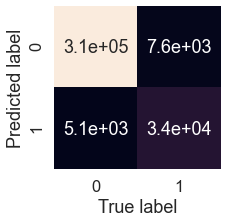

In [12]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

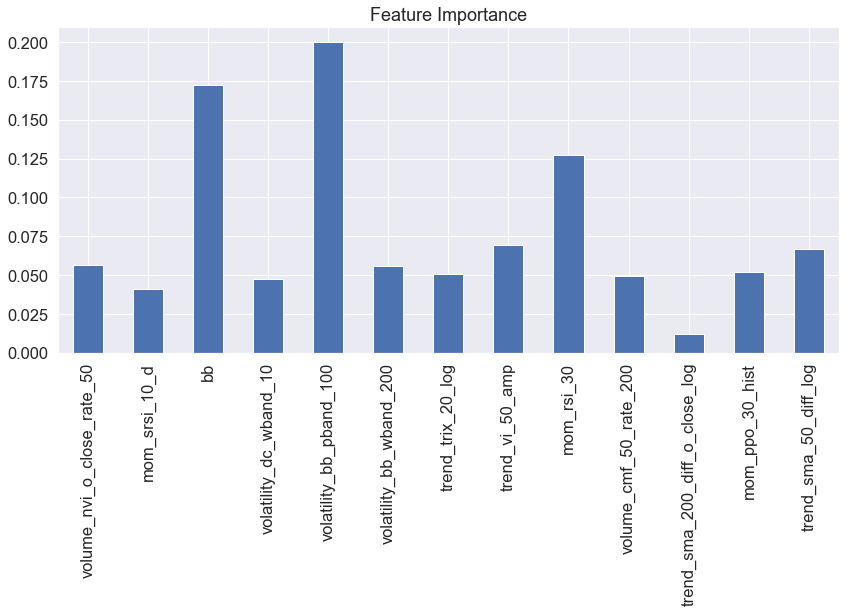

In [13]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(14, 6));

In [32]:
d = {}
d["precision"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))
d

{'precision': 0.6310208689903781}

In [33]:
d["recall"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='recall'))
d

{'precision': 0.6310208689903781, 'recall': 0.5788185127798143}

In [34]:
d["f1"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1'))
d

{'precision': 0.6310208689903781,
 'recall': 0.5788185127798143,
 'f1': 0.5863005409669492}

100000
100000


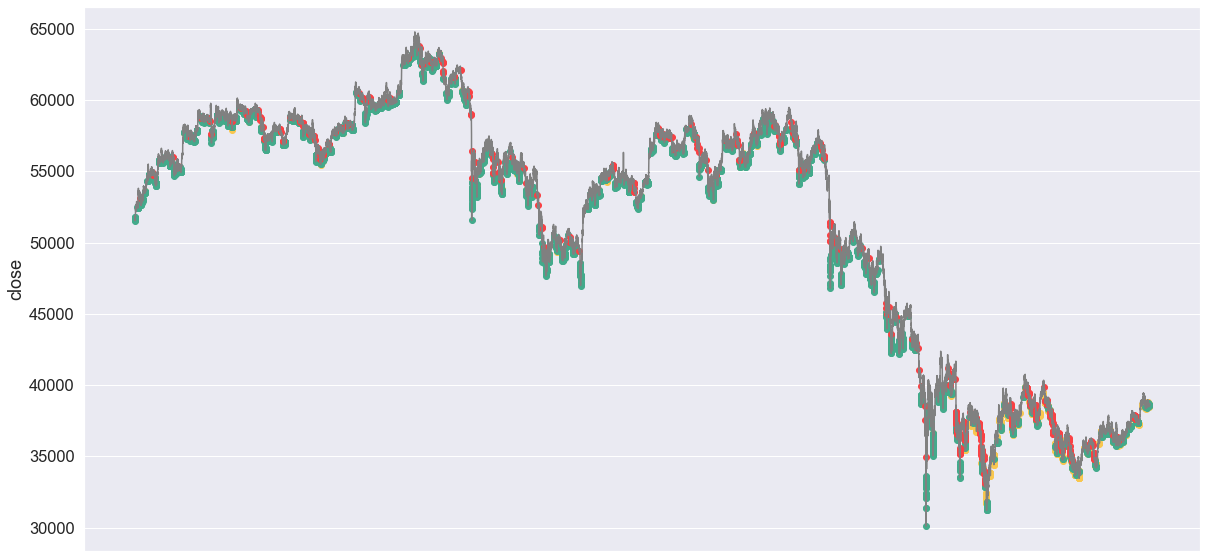

In [41]:
a = 0
b = 100000 #max 20000
results = model.predict(X_ft[a:b])
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close[a:b]))

s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft[a:b], close[a:b]))
s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft[a:b], close[a:b]))
s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft[a:b], close[a:b]))

fig,ax = plt.subplots(figsize=(20, 10))

print(len(close[a:b]))
print(len(scatter_results))

rows = len(close[a:b])

# ax.scatter(range(rows), 
#             scatter_results,
#             color="#43aa8b")


ax.scatter(range(rows), 
            s_missed,
        color="#f9c74f")

ax.scatter(range(rows), 
            s_correct,
        color="#43aa8b")

ax.scatter(range(rows), 
            s_wrong,
        color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close[a:b],
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

In [42]:
test = pd.DataFrame(results, columns=["target"])
test["close"] = list(close)
test["high"] = list(high)
test["low"] = list(low)

In [43]:
test.to_csv("data/dip-test.csv", index=False)
# X_ft.to_csv("data/xft-dip-test.csv", index=False)

## Documentation of scores
| Modules (in order) | Precision (cv=5) E=error| F1 | TP:FP (TP/FP) | Notes |
| --- | :---: | :---: | :---: | --- |
| ` ` `sma` ` ` `volatility` `volume` | E:0. | 0. | 180/97 | |
| `momentum` `sma` `trend-` `volatility` `volume` | E:0. | 0. |  | |



| `momentum` `sma` `trend-` `volatility` `volume` | E:0. | 0. |  | |



In [55]:
from joblib import dump, load

In [56]:
dump(model, 'models/model_minute_dip_v1.test.joblib') 

['models/model_minute_dip_v1.test.joblib']